In [1]:
# https://github.com/pik1989/MLProject-ChurnPrediction
# https://www.kaggle.com/code/kabure/insightful-eda-churn-customers-models-pipeline

# 012652 0D94FB

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Data set looks pretty clean 

In [6]:
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see most of the data types of features are correct except `TotalCharges` though its float but its showing objects <br>
So let's inspect this feature first 

In [9]:
for i in range(len(df)) : 
    try : 
        df['TotalCharges'].iloc[i] = float(df['TotalCharges'].iloc[i])
    except : 
        print("|", df['TotalCharges'].iloc[i], "| at", i)

# we can see there are some blank spaces 
# we 1st plot the distribution of the remaining values to see which method should be applied to handle these 
# we 1st replace the missing values with np.nan and try to check similar patterns in other features too 

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


|   | at 488
|   | at 753
|   | at 936
|   | at 1082
|   | at 1340
|   | at 3331
|   | at 3826
|   | at 4380
|   | at 5218
|   | at 6670
|   | at 6754


strip all the colums

In [10]:
for col in df.columns :
    if df.dtypes[col] == 'object' and col != 'TotalCharges' : 
        df[col] = df[col].str.strip()

check if there is any other feature with such missing values 

In [11]:
for col in df.columns : 
    if df.dtypes[col] == 'object' and col != 'TotalCharges' : 
        for i in range(len(df)) : 
            if "  " in df[col].iloc[i] : 
                print(col, i)
        else : 
            print(col, ' --> checked')

customerID  --> checked
gender  --> checked
Partner  --> checked
Dependents  --> checked
PhoneService  --> checked
MultipleLines  --> checked
InternetService  --> checked
OnlineSecurity  --> checked
OnlineBackup  --> checked
DeviceProtection  --> checked
TechSupport  --> checked
StreamingTV  --> checked
StreamingMovies  --> checked
Contract  --> checked
PaperlessBilling  --> checked
PaymentMethod  --> checked
Churn  --> checked


C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


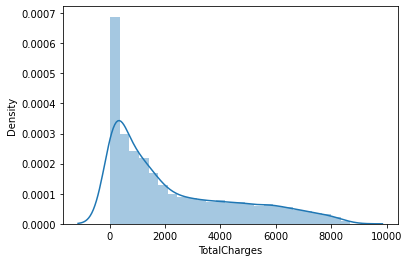

In [12]:
# plot distribution of TotalCharges

for i in range(len(df)) : 
    try : 
        df['TotalCharges'].iloc[i] = float(df['TotalCharges'].iloc[i])
    except : 
        df['TotalCharges'].iloc[i] = np.nan

df['TotalCharges'] = df['TotalCharges'].astype(float)
sns.distplot(df['TotalCharges']);

In [13]:
# TotalCharges has a skewed distribution so we fill this with median 
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.to_csv('../data/preprocessed_data.csv', encoding='utf-8', index= False)